In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def get_neighbors(i, df, euc_dist, eps):

    neighbors = []

    for j in range(len(df)):
        if i != j:
            d = euc_dist[i][j]
            if d <= eps:
                neighbors.append(j)

    return neighbors
  

In [4]:
def get_cluster_labels(df, clusters):

    labels = np.full(len(df), fill_value=-1)

    for i, cluster in enumerate(clusters):
        for c in cluster:
            labels[c] = i+1
  
    return labels

### Circles

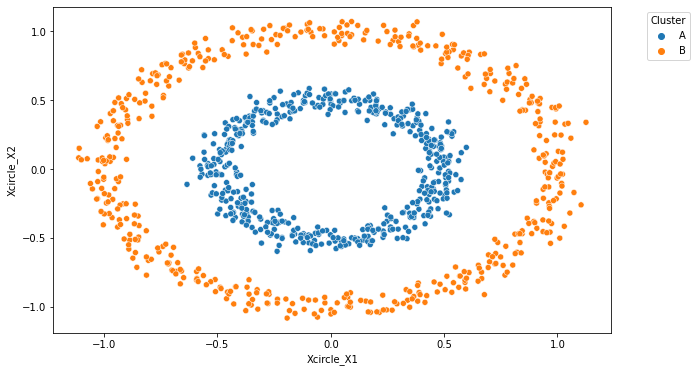

In [5]:
df = pd.read_csv('/content/drive/MyDrive/UML/HW3/circle.csv')

eps = 0.1
min_samples = 3
visited_samples = [False for i in range(len(df))]
cluster_labels = [-1 for i in range(len(df))]
neighbors = {}

core = []
non_core = []


# Calculate Euclidean Distance

euc_dist = euclidean_distances(df)


# Neighborhood Creation

for i in range(len(df)):
    neighbors[i] = get_neighbors(i, df, euc_dist, eps)
    if len(neighbors[i]) >= min_samples:
        core.append(i)
    else:
        non_core.append(i)


# Iterate through samples and expand clusters from them if they have more neighbors than min_samples

cn = 'A'

for i in core:

    if visited_samples[i]:
        continue

    stack = [i]
    cluster_labels[i] = cn

    while stack:

        n = stack.pop()

        if visited_samples[n]:
            continue

        visited_samples[n] = True

        if n in core:
            for nn in neighbors[n]:
                cluster_labels[nn] = cn
            stack.extend(neighbors[n])

        else:
            cluster_labels[n] = cn

    cn = chr(ord(cn) + 1)


# Get the resulting cluster labels

df['cluster'] = cluster_labels


# Plot clusters

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Xcircle_X1', y='Xcircle_X2', hue='cluster')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Cluster')

### Blobs

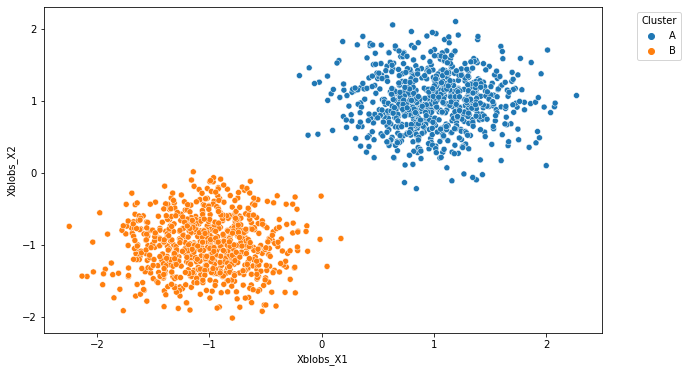

In [6]:
df = pd.read_csv('/content/drive/MyDrive/UML/HW3/blobs.csv')

eps = 0.35
min_samples = 5
visited_samples = [False for i in range(len(df))]
cluster_labels = [-1 for i in range(len(df))]
neighbors = {}

core = []
non_core = []


# Calculate Euclidean Distance

euc_dist = euclidean_distances(df)


# Neighborhood Creation

for i in range(len(df)):
    neighbors[i] = get_neighbors(i, df, euc_dist, eps)
    if len(neighbors[i]) >= min_samples:
        core.append(i)
    else:
        non_core.append(i)


# Iterate through samples and expand clusters from them if they have more neighbors than min_samples

cn = 'A'

for i in core:

    if visited_samples[i]:
        continue

    stack = [i]
    cluster_labels[i] = cn

    while stack:

        n = stack.pop()

        if visited_samples[n]:
            continue

        visited_samples[n] = True

        if n in core:
            for nn in neighbors[n]:
                cluster_labels[nn] = cn
            stack.extend(neighbors[n])

        else:
            cluster_labels[n] = cn

    cn = chr(ord(cn) + 1)


# Get the resulting cluster labels

df['cluster'] = cluster_labels


# Plot clusters

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Xblobs_X1', y='Xblobs_X2', hue='cluster')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Cluster')

### Moons

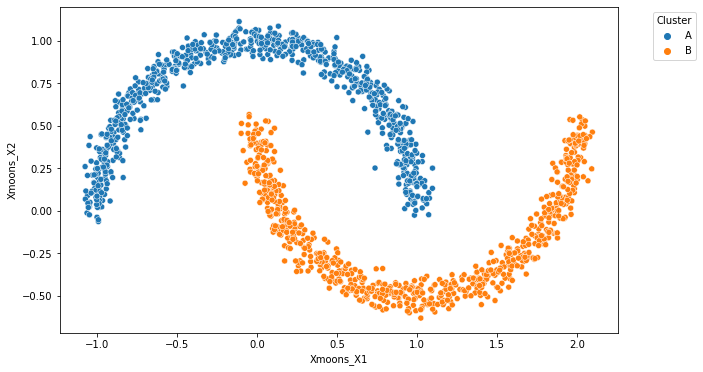

In [7]:
df = pd.read_csv('/content/drive/MyDrive/UML/HW3/moons.csv')

eps = 0.2
min_samples = 15
visited_samples = [False for i in range(len(df))]
cluster_labels = [-1 for i in range(len(df))]
neighbors = {}

core = []
non_core = []


# Calculate Euclidean Distance

euc_dist = euclidean_distances(df)


# Neighborhood Creation
# Assigning points as core and non-core

for i in range(len(df)):
    neighbors[i] = get_neighbors(i, df, euc_dist, eps)
    if len(neighbors[i]) >= min_samples:
        core.append(i)
    else:
        non_core.append(i)


# Iterate through samples and expand clusters from them if they have more neighbors than min_samples

cn = 'A'

for i in core:

    if visited_samples[i]:
        continue

    stack = [i]
    cluster_labels[i] = cn

    while stack:

        n = stack.pop()

        if visited_samples[n]:
            continue

        visited_samples[n] = True

        if n in core:
            for nn in neighbors[n]:
                cluster_labels[nn] = cn
            stack.extend(neighbors[n])

        else:
            cluster_labels[n] = cn

    cn = chr(ord(cn) + 1)


# Get the resulting cluster labels

df['cluster'] = cluster_labels


# Plot clusters

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Xmoons_X1', y='Xmoons_X2', hue='cluster')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Cluster')